<a href="https://colab.research.google.com/github/itssraj/sfguide-data-engineering-with-notebooks/blob/main/Outliers_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_Train.csv')

In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
new_data = data.drop(['Name', 'Ticket', 'Cabin'],axis=1)

In [52]:
new_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<Axes: ylabel='Fare'>

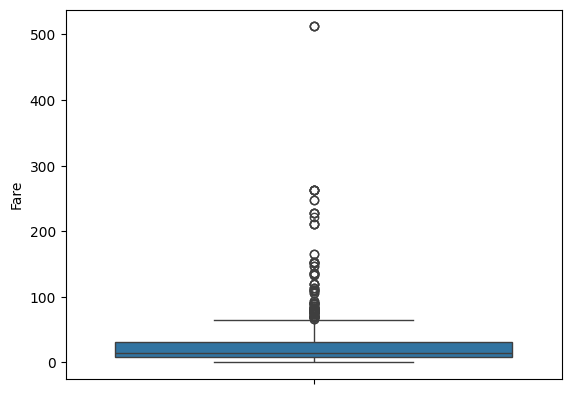

In [53]:
sns.boxplot(data['Fare'])

In [22]:
len(np.where(new_data['Fare'].values > 100)[0])

53

In [56]:
np.max(new_data['Fare'].values)

np.float64(512.3292)

In [55]:
np.min(new_data['Fare'].values)

np.float64(0.0)

In [54]:
np.mean(new_data['Fare'].values)

np.float64(32.204207968574636)

In [57]:
q1 = new_data['Fare'].quantile(0.25)

In [58]:
q3 = new_data['Fare'].quantile(0.75)

In [61]:
IQR = (q3 - q1)

IQR

np.float64(23.0896)

In [65]:
new_data = new_data[~((new_data['Fare'] < (q1-1.5*IQR)) | (data['Fare'] > (q3+1.5*IQR)))]

<Axes: ylabel='Fare'>

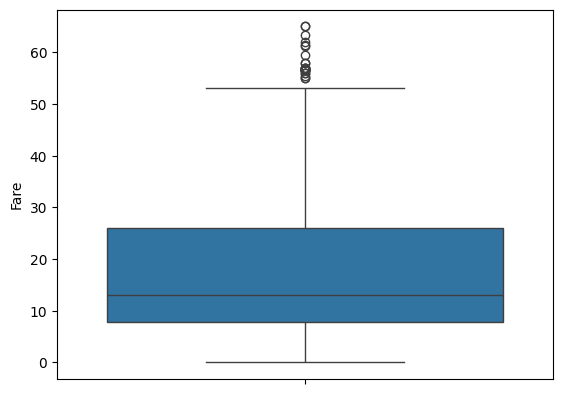

In [66]:
sns.boxplot(new_data['Fare'])